## Introduction

This project aims to analyze a large corpus of financial news data to uncover insights into the relationship between news sentiment and stock market movements, as part of a challenge by Nova Financial Solutions. The primary objectives are twofold: (1) perform sentiment analysis on financial news headlines to quantify their tone, and (2) establish correlations between news sentiment and stock price movements to inform predictive investment strategies. By leveraging data engineering, financial analytics, and machine learning techniques, this notebook conducts exploratory data analysis (EDA), text cleaning, topic modeling, sentiment analysis, and publisher domain analysis. The insights derived will help Nova Financial Solutions enhance its predictive analytics capabilities, improve financial forecasting accuracy, and develop innovative strategies for stock market trend prediction.

---


### Set Up Python Path
Add the parent directory to the Python path so that scripts in the parent folder can be imported.

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

### Import Required Modules
Import all necessary functions and modules for data loading, EDA, text analysis, sentiment analysis, and publisher analysis.

In [2]:
from scripts.load_data import load_news_data
from scripts.eda import (
    describe_headlines,
    analyze_publishers,
    plot_articles_per_day,
    plot_publishing_hour
)
from scripts.text_analysis import apply_cleaning, plot_wordcloud, plot_top_keywords, plot_tfidf_top_terms
from scripts.sentiment_analysis import compute_sentiment, plot_sentiment_distribution
from scripts.publisher_analysis import analyze_domains

### Load Data
Load the raw analyst ratings data into a DataFrame for analysis.

In [3]:
# Load
news_df = load_news_data("../data/raw_analyst_ratings.csv")

### Exploratory Data Analysis (EDA)
Generate summary statistics and visualizations to understand the dataset's structure and key characteristics.

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_len, dtype: float64

Top Publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64

Top Publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


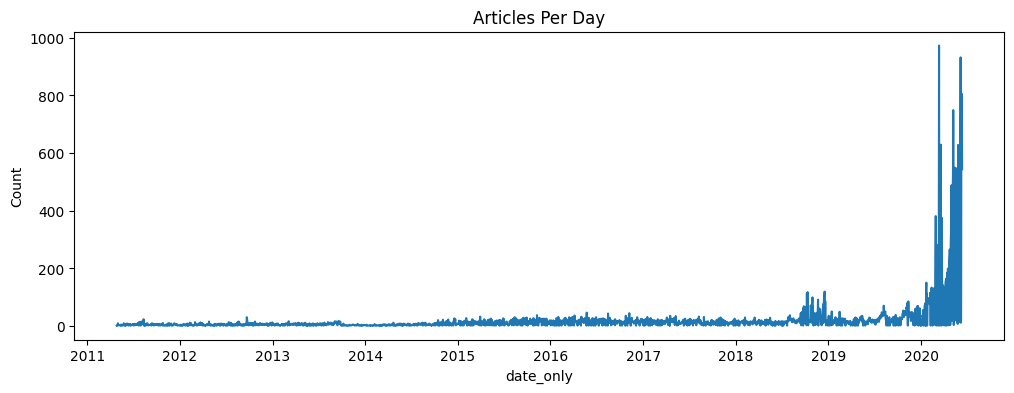

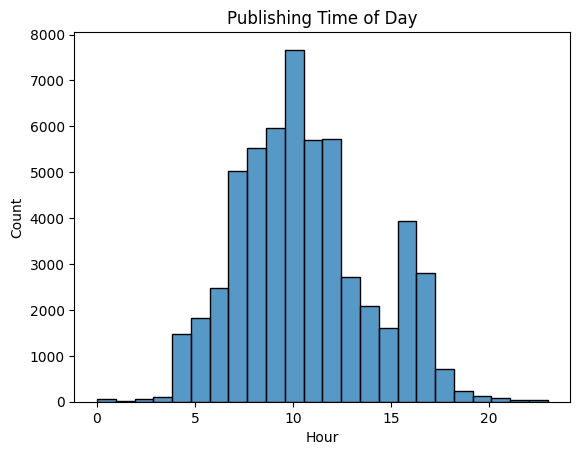

In [4]:
# EDA
describe_headlines(news_df)
analyze_publishers(news_df)
plot_articles_per_day(news_df)
plot_publishing_hour(news_df)

**Code Explanation:**
- `describe_headlines(news_df)`: Displays summary statistics and sample headlines, helping to understand the dataset's content and structure.
- `analyze_publishers(news_df)`: Shows the distribution of articles by publisher, highlighting the most frequent sources.
- `plot_articles_per_day(news_df)`: Visualizes the number of articles published each day, revealing trends or spikes in news volume.
- `plot_publishing_hour(news_df)`: Illustrates the distribution of publishing times throughout the day, which can indicate when news is most frequently released.

**Headline Length Statistics:**
- The headlines have an average length of approximately 73 characters, with a standard deviation of 41 characters. The shortest headline is 3 characters, while the longest is 512 characters, indicating significant variability in headline length.

**Top Publishers:**
- The top publishers include Paul Quintaro, Lisa Levin, and Benzinga Newsdesk, contributing the majority of the articles in the dataset.

- **Articles Per Day**: The visualization shows a relatively low volume of articles from 2011 to early 2020, followed by a significant spike in article publications in 2020. This spike could be attributed to increased financial market volatility or significant global events impacting the stock market during that period.

- **Publishing Time of Day**: The histogram reveals that most articles are published between 8 AM and 12 PM, with a peak around 10 AM. A secondary peak occurs around 4 PM, likely aligning with key market events such as market openings, earnings releases, or end-of-day summaries.

### Insights

- The variability in headline length suggests diverse content styles, from concise updates to more detailed reports.
- The dominance of a few publishers indicates that a small group of sources contributes the majority of the news, which may introduce bias in the dataset.
- The spike in articles in 2020 aligns with major financial events, such as market reactions to the global pandemic, which likely increased news coverage.
- Publishing times correlate with typical market activity hours, suggesting that news is released strategically to align with trading sessions.

---

### Text Cleaning and Topic Modeling
Clean the news headlines and perform topic modeling to extract key themes and keywords.

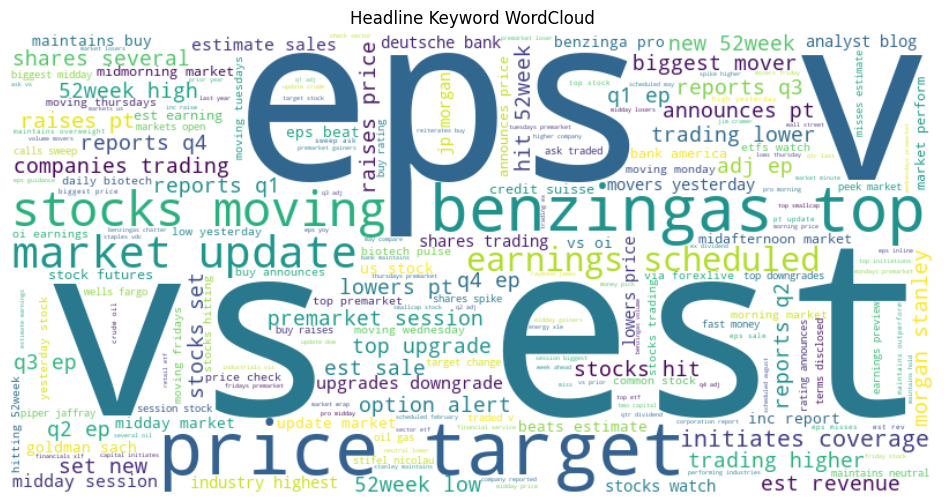

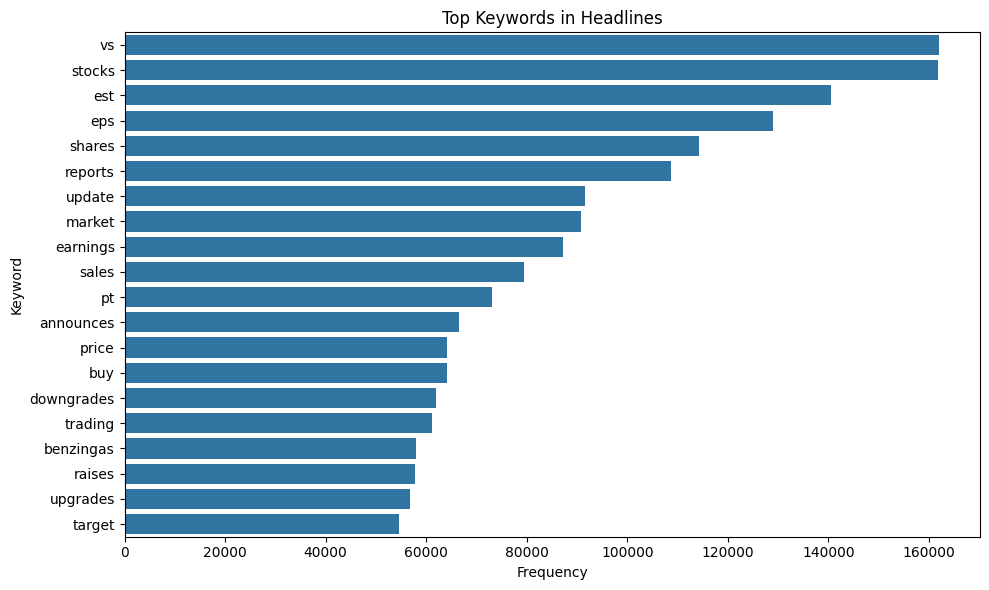

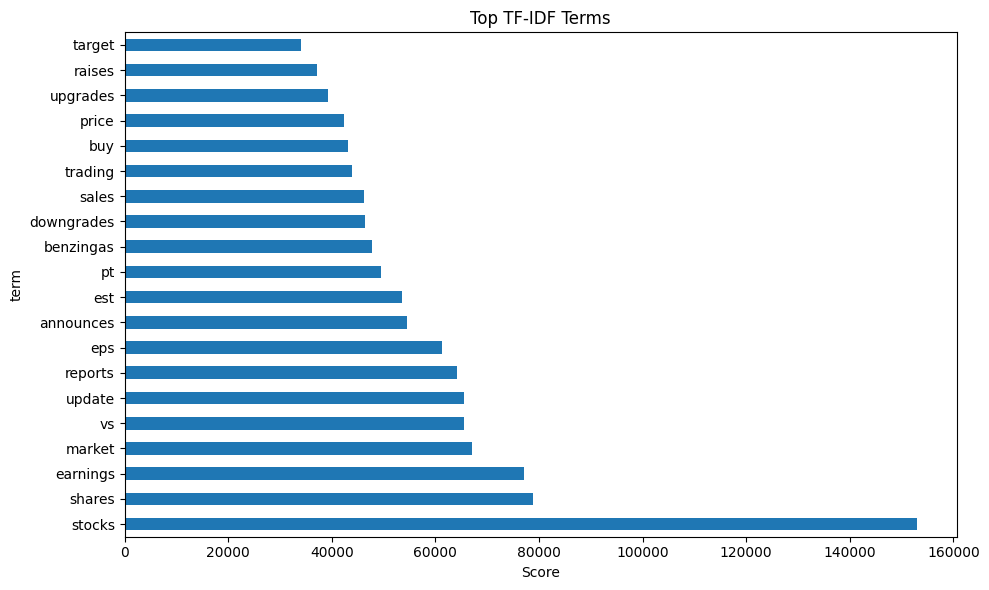

In [5]:
# Text Cleaning + Topic Modeling
apply_cleaning(news_df)
plot_wordcloud(news_df)
plot_top_keywords(news_df["clean_headline"])
plot_tfidf_top_terms(news_df["clean_headline"])

**Code Explanation:**
- `apply_cleaning(news_df)`: Cleans the headlines by removing noise, making them suitable for analysis.
- `plot_wordcloud(news_df)`: Generates a word cloud to visualize the most common words in the headlines.
- `plot_top_keywords(news_df["clean_headline"])`: Displays the top keywords extracted from the cleaned headlines.
- `plot_tfidf_top_terms(news_df["clean_headline"])`: Shows the most important terms based on TF-IDF scores, highlighting unique and relevant words.

- **Word Cloud**: The word cloud highlights frequent terms such as "stocks," "eps," "est," "price," and "vs," indicating a focus on stock performance, earnings, and comparisons.

- **Top Keywords in Headlines**: The top keywords include "vs," "stocks," "est," "eps," and "shares," with frequencies exceeding 140,000 for the most common terms. These keywords reflect the dataset's emphasis on stock comparisons, earnings estimates, and trading activities.

- **Top TF-IDF Terms**: TF-IDF analysis identifies "stocks," "shares," and "earnings" as the most significant terms, with scores above 140,000. Terms like "benzings," "downgrades," and "upgrades" also rank high, suggesting a focus on analyst ratings and market updates.

### Insights

- The prominence of terms like "stocks," "eps," and "est" indicates that the dataset primarily covers stock performance and earnings-related news, which are critical drivers of market movements.
- The high TF-IDF scores for "benzings," "downgrades," and "upgrades" reflect the influence of analyst ratings and the dataset's association with Benzinga, a key publisher.
- The overlap between top keywords and TF-IDF terms suggests consistency in the dataset's focus on financial performance metrics and market updates.

---

### Sentiment Analysis
Compute sentiment scores for the news headlines and visualize the sentiment distribution.

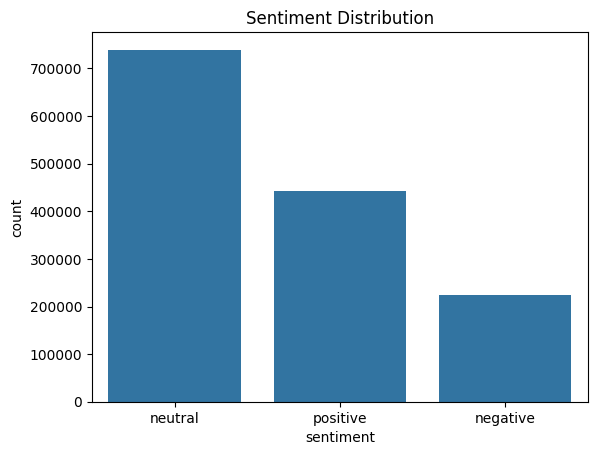

In [6]:
# Sentiment
compute_sentiment(news_df)
plot_sentiment_distribution(news_df)

**Code Explanation:**
- `compute_sentiment(news_df)`: Calculates sentiment scores (positive, negative, neutral) for each headline.
- `plot_sentiment_distribution(news_df)`: Visualizes the overall sentiment distribution, providing insights into the tone of the news data.

- **Sentiment Distribution**: The histogram shows that the majority of headlines (around 700,000) are neutral, followed by approximately 450,000 positive headlines and 200,000 negative headlines.

### Insights

- The predominance of neutral sentiment suggests that financial news headlines often aim to report facts objectively, such as earnings or price updates.
- The higher number of positive headlines compared to negative ones may indicate a tendency to highlight favorable news, such as upgrades or strong earnings, potentially influencing investor sentiment.
- The relatively smaller proportion of negative headlines could reflect a cautious approach by publishers to avoid overly pessimistic reporting, which might impact market stability.

---

### Publisher Domain Analysis
Analyze the domains of news publishers to understand the distribution of sources.


Top Email Domains:
 publisher_domain
paul quintaro        228373
lisa levin           186979
benzinga newsdesk    150484
charles gross         96732
monica gerson         82380
eddie staley          57254
hal lindon            49047
etf professor         28489
juan lopez            28438
benzinga staff        28114
Name: count, dtype: int64


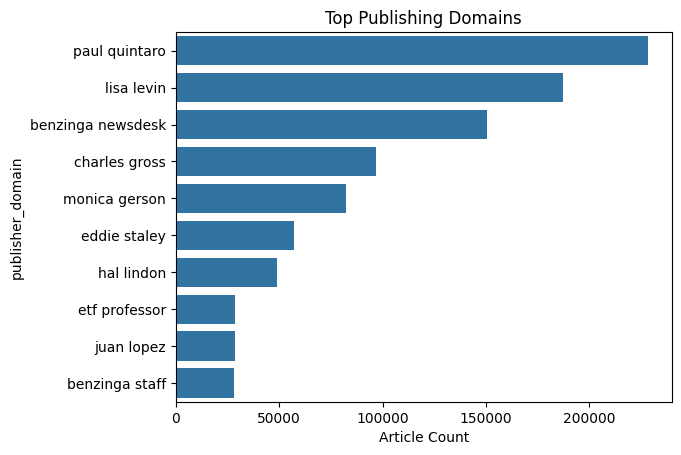

In [7]:
# Publisher Domains
analyze_domains(news_df)

**Code Explanation:**
- `analyze_domains(news_df)`: Analyzes and visualizes the distribution of publisher domains, helping to identify the most common sources and their diversity.

**Top Publishing Domains**: The bar chart confirms that Paul Quintaro, Lisa Levin, and Benzinga Newsdesk are the most prolific domains, aligning with the publisher analysis.

### Insights

- The concentration of articles from a few domains (e.g., Paul Quintaro, Lisa Levin, Benzinga Newsdesk) reinforces the earlier finding of publisher dominance, suggesting a potential lack of diversity in news sources.
- The significant contribution from Benzinga-related domains ("benzinga newsdesk," "benzinga staff") indicates that Benzinga is a major player in financial news, which may influence the dataset's perspective on market events.

---

### Save Cleaned Data
Export the processed DataFrame to a CSV file for future use.

In [8]:
# Save cleaned data
news_df.to_csv("../data/processed_analyst_ratings.csv", index=False)

**Output Explanation:**
- `news_df.to_csv(...)`: Saves the cleaned and processed DataFrame to a CSV file, making it available for future analysis or modeling.

## Overall Insights and Summary

This analysis provides a comprehensive exploration of financial news headlines, addressing Nova Financial Solutions' objectives of enhancing predictive analytics through sentiment and correlation analysis. Key findings include:

- **Data Characteristics**: The dataset contains over 1.4 million headlines, with significant activity in 2020, likely driven by market volatility. Articles are predominantly published during market hours (8 AM to 12 PM), aligning with trading sessions.
- **Dominant Themes**: Topic modeling reveals a focus on stock performance ("stocks," "eps," "shares") and analyst actions ("upgrades," "downgrades"), reflecting the dataset's relevance to financial markets.
- **Sentiment Trends**: Most headlines are neutral (700,000), followed by positive (450,000) and negative (200,000), suggesting a balanced but slightly optimistic tone in financial reporting.
- **Publisher Influence**: A few publishers, notably Paul Quintaro, Lisa Levin, and Benzinga Newsdesk, dominate the dataset, indicating a potential bias in news perspective.
- **Actionable Insights**: The prevalence of neutral and positive sentiments can be leveraged to predict short-term market reactions, as positive news may drive upward stock movements. The focus on earnings and analyst ratings suggests that these events are key drivers of market sentiment.

### Recommendations

1. **Sentiment-Based Trading Strategy**: Develop a strategy that monitors sentiment trends in real-time, using positive sentiment spikes as buy signals and negative spikes as sell signals, particularly around earnings announcements.
2. **Focus on Key Events**: Prioritize news related to earnings, upgrades, and downgrades, as these themes are most prevalent and likely to impact stock prices.
3. **Diversify News Sources**: To mitigate bias, incorporate additional news sources beyond Benzinga and top publishers, ensuring a more balanced perspective on market sentiment.
4. **Correlation Analysis**: Future work should focus on linking sentiment scores with stock price data, using the publication date and time to measure immediate market reactions to news sentiment.